# Python Practice Assignment
---
**Instructions**: Please use the Module 1 discussion board on Canvas for hints and other discussions.

#### Q1: Write Python code to ask the user for his/her date of birth in exactly MM/DD/YY format. Provide the user with his/her zodiac sign.
Example:

Please provide your Date of Birth in MM/DD/YY format.

Input:12/11/10

Output: Hello Sagittarius! 

Output: Error message if the DoB was not in correct format.


In [11]:
# I pledge my honor that I have abided by the Stevens Honor System

print("Please provide your Date of Birth in MM/DD/YY format.")

def isdigits(chars):
    digits = "0123456789"
    for char in chars:
        if char not in digits:
            return False
    return True

maxdays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Organize signs into array to avoid massive if else statements
signs = [["Capricorn" if i <= 19 else "Aquarius" for i in range(1, 32)],
         ["Aquarius" if i <= 18 else "Pisces" for i in range(1, 32)],
         ["Pisces" if i <= 20 else "Aries" for i in range(1, 32)],
         ["Aries" if i <= 19 else "Taurus" for i in range(1, 32)],
         ["Taurus" if i <= 20 else "Gemini" for i in range(1, 32)],
         ["Gemini" if i <= 21 else "Cancer" for i in range(1, 32)],
         ["Cancer" if i <= 22 else "Leo" for i in range(1, 32)],
         ["Leo" if i <= 22 else "Virgo" for i in range(1, 32)],
         ["Virgo" if i <= 22 else "Libra" for i in range(1, 32)],
         ["Libra" if i <= 22 else "Scorpio" for i in range(1, 32)],
         ["Scorpio" if i <= 21 else "Sagittarius" for i in range(1, 32)],
         ["Sagittarius" if i <= 21 else "Capricorn" for i in range(1, 32)],
]

while True:
    dob = input("")
    # Check format of date
    if len(dob) != 8 or dob[2] != "/" or dob[5] != "/" or not isdigits(dob[0:1]+dob[3:4]+dob[6:7]):
        print("Provided date not in correct format. Please provide date in MM/DD/YY format.")
        continue
    # Extract information
    m, d, y = dob.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    # Confirm date makes sense
    if m > 12:
        print("Month is greater than 12. Please provide a valid date.")
        continue
    if (d > 29 if (m == 2 and y % 4 == 0) else d > maxdays[m - 1]):
        print("Day is greather than the last day of the provided month. Please provide a valid date.")
        continue
    # Extract sign from prebuilt array
    print(f"Hello {signs[m-1][d-1]}!")
    break
    


Please provide your Date of Birth in MM/DD/YY format.
Hello Leo!


#### Q2: Give a bar-chart for the number of each vowels (including 'y') in a paragraph that you read from a textfile.
Example:

Input: Provide the path to a textfile

Output: There are 8 'A', 10 'e', ... as shown in the bar chart below.

Output: Errors message for various reasons


There are 1 'A', 5 'E', 3 'I', 2 'Y', 56 'a', 110 'e', 62 'i', 82 'o', 28 'u', 19 'y', as shown in the bar chart below.


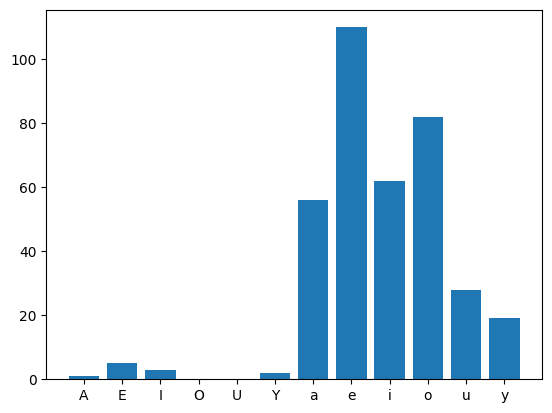

In [6]:
# Your Code Here
import matplotlib.pyplot as plt

# Example implies capitals are counted seperately. 
vowels = ["A","E","I","O","U","Y","a","e","i","o","u","y"]
counts = {v: 0 for v in vowels}

while True:
    try:
        # Read the text file and count vowels
        with open(input("Please input path: "), "r") as text:
            lines = text.readlines()
            for line in lines:
                for char in line:
                    if char in vowels:
                        counts[char] += 1
        break
    except:
        # Ask again if file not found/not readable
        print("Please enter a valid path to a readable existing file. ")

# Construct output string
s = "There are "
for v in vowels:
    if counts[v] != 0:
        s += f"{counts[v]} '{v}', "
s += "as shown in the bar chart below."
print(s)

# Create and show plot
plt.bar(vowels, [counts[v] for v in vowels])
plt.show()



#### Q3: Ask the user for a natural number. Print a Pascal's Triangle in return for the given natural number.
Example:

Input:Please give me a decent natural number. -> 7

Output:
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtLzgCTQAUcbHXAJm7maPFgfBIY-KTDXcqpdWVvtwVOXebEDVRMsXQEgzDlpQrLRQ6a9k&usqp=CAU" width=30%/>

In [1]:
# Your Code
import math

# Create a generator function that yields the first n rows of Pascal's triangle as arrays
def pascal_rows(n):
    k = n
    row = [1]
    while True:
        # Yield row
        srow = row.copy()
        for i in range(len(row)):
            srow[i] = str(srow[i])
        yield srow
        # Stop if n rows output
        if k == 1:
            break
        # Generate next row from previous row using Pascal's triangle rule
        next_row = [0] * (len(row) + 1)
        for i in range(len(next_row)):
            if i == 0:
                next_row[i] = 1
            elif i == len(next_row) - 1:
                next_row[i] = 1
            else:
                next_row[i] = row[i - 1] + row[i]
        row = next_row
        k -= 1

# Get user input
while True:
    n = input("Give me a decent natural number. ")
    try:
        n = int(n)
    except ValueError:
        print("Please enter a number.")
        continue
    if n <= 0:
        print("Please enter a natural number (non-zero positive integer)")
    break

rows = list(pascal_rows(n))

# Get number of spaces by length of largest number
# Assume largest number is in middle of last row and number of items in row is equal to row number
# Require odd spaces
spaces = len(rows[-1][math.floor(len(rows) / 2)]) 
spaces = spaces + (1 - spaces % 2)
# Generate non-centered strings
strs = []
for row in rows:
    strs.append((" " * spaces).join(row))

# Generate centered strings
l = len(strs[-1])
middle = math.floor(l / 2) - 1
final_strs = [" " * l for _ in strs]
for i in range(len(final_strs)):
    left = middle - (math.floor(len(strs[i]) / 2) - 1)
    final_strs[i] = final_strs[i][0: left] + strs[i] + final_strs[i][left + len(strs[i]):]

for s in final_strs:
    print(s)


              1             
            1   1           
          1   2   1         
        1   3   3   1       
      1   4   6   4   1     
   1   5   10   10   5   1  
1   6   15   20   15   6   1


#### Q4: Ask the user to provide a real number called z, and the coefficients of the following polynomial
$$P(x)=a_0+a_1 x + a_2 x^2 + \cdots + a_n x^n$$

Write a function to evaluate this polynomial in linear time (and order of operations) by using [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method)

$$
\begin{align}
a_0 &+ a_1x + a_2x^2 + a_3x^3 + \cdots + a_nx^n \\
 &= a_0 + x \bigg(a_1 + x \Big(a_2 + x \big(a_3 + \cdots + x(a_{n-1} + x \, a_n) \cdots \big) \Big) \bigg).
\end{align}
$$

Return the value of the polynomial $P(z)$.

Example:

Input: Provide z-> 2

Input: Provide the Coefficients of the polynomial-> 1 -2 3 0 0 -1

Output1: The provided polynomial is P(x)=1-2x+3x^2-x^5.

Output2: P(2)= 1-2(2)+3(2)^2-(2)^5=-23.

Output: Error Message for various reasons.


In [47]:
# Your Code
while True:
    z = input("Provide z-> ")
    try:
        z = int(z)
    except:
        print("Please enter a valid integer for z")
        continue
    break
while True:
    coeff = input("Provide the Coefficients of the polynomial-> ")
    try:
        coeffs = coeff.split(" ")
        for i in range(len(coeffs)):
            coeffs[i] = int(coeffs[i])
    except:
        print("Please enter a valid integer for all coefficients")
        continue
    break

outpoly = "The provided polynomial is "
genstr = "P(x)="
exstr = f"P({z})="

def polystr(evaluate = False, evalat = "0"):
    expo = 0
    polystr = ""
    for a in coeffs:
        # Do not include if coefficient is 0. IF ONLY ENTRY THEN ASSUME CONSTANT AND RETURN CUSTOM
        if a == 0:
            if expo == 0 and len(coeffs) == 1:
                polystr="0"
                break
            expo += 1
            continue
        # Setup x power substring. Leave empty if x^0, only "x" if x^1, otherwise "x^k" where k = current exponent = expo
        x = "x" if not evaluate else f"{evalat}"
        xstr = ""
        if expo == 1:
            xstr = f"({x})"
        elif expo > 1:
            xstr = f"({x})^{expo}"
        # Construct next part of polynomial string
        # Connector sets up addition or substraction based on sgn(a)
        connector = "-" if a < 0 else "+"
        # Only include connector if it isn't the first entry OR if the first entry is negative
        connector = connector if (polystr != "" or connector == "-") else ""
        # Construct next fragment of polynomial as the connector followed by the absolute value of the coefficient
        # (the sign of the coefficient is encapsulated in connector). Do not show coefficient ONLY IF its absolute
        # value is 1 AND IT ISN'T THE CONSTANT in the polynomial. Follow by xstr.
        polystr += connector + (str(abs(a)) if (abs(a) != 1 or expo == 0) else "") + xstr
        expo += 1
    return polystr


print(outpoly + genstr + polystr() + ".")

# Horner's method. set b to last coeff
b = coeffs[-1]

# Loop through rest of coefficients in reverse
for i in range(len(coeffs) - 2, -1, -1):
    b = coeffs[i] + b * z

# Output result
print(outpoly + exstr + polystr(evaluate=True, evalat=str(z)) + f"={b}.")


The provided polynomial is P(x)=1+2(x)^3+3(x)^4.
The provided polynomial is P(4)=1+2(4)^3+3(4)^4=897.
